<a href="https://colab.research.google.com/github/bharti001/Machine-Learning-/blob/main/Assignment_05_bharti_singal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Practice Displaying***

Practiced to display arrays and read shapes and see sample images


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Summary of the MNIST dataset arrays:

Training Images:
  What it is: The images used for training the model.
  Comprised of: A NumPy array with shape (60000, 28, 28) and data type uint8.
  Shape breakdown: 60000 images, each of size 28x28 pixels.


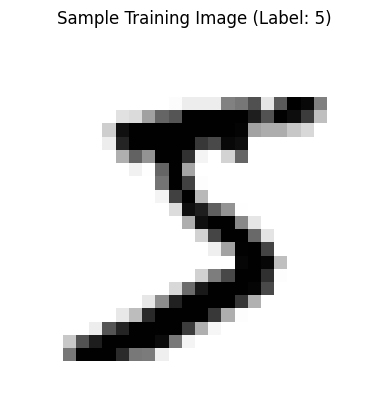


Training Labels:
  What it is: The labels corresponding to the training images.
  Comprised of: A NumPy array with shape (60000,) and data type uint8.
  Shape breakdown: 60000 labels, corresponding to each training image.
Maximum pixel value in training images: 255

Test Images:
  What it is: The images used for evaluating the trained model.
  Comprised of: A NumPy array with shape (10000, 28, 28) and data type uint8.
  Shape breakdown: 10000 images, each of size 28x28 pixels.


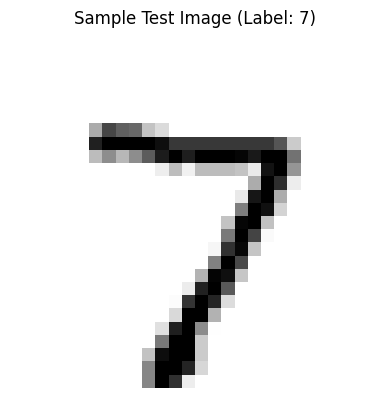


Test Labels:
  What it is: The labels corresponding to the test images.
  Comprised of: A NumPy array with shape (10000,) and data type uint8.
  Shape breakdown: 10000 labels, corresponding to each test image.
Maximum pixel value in test images: 255


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist, fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# Assuming dataset_output contains the output from mnist.load_data()
# Unpack the nested tuple
dataset_output = mnist.load_data() # Define dataset_output here
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = dataset_output

print("Summary of the MNIST dataset arrays:")

print("\nTraining Images:")
print(f"  What it is: The images used for training the model.")
print(f"  Comprised of: A NumPy array with shape {mnist_train_images.shape} and data type {mnist_train_images.dtype}.")
print(f"  Shape breakdown: {mnist_train_images.shape[0]} images, each of size {mnist_train_images.shape[1]}x{mnist_train_images.shape[2]} pixels.")
# Display a sample training image
plt.figure()
plt.imshow(mnist_train_images[0], cmap=plt.cm.binary)
plt.title(f"Sample Training Image (Label: {mnist_train_labels[0]})")
plt.axis('off')
plt.show()

print("\nTraining Labels:")
print(f"  What it is: The labels corresponding to the training images.")
print(f"  Comprised of: A NumPy array with shape {mnist_train_labels.shape} and data type {mnist_train_labels.dtype}.")
print(f"  Shape breakdown: {mnist_train_labels.shape[0]} labels, corresponding to each training image.")
print(f"Maximum pixel value in training images: {mnist_train_images.max()}")

print("\nTest Images:")
print(f"  What it is: The images used for evaluating the trained model.")
print(f"  Comprised of: A NumPy array with shape {mnist_test_images.shape} and data type {mnist_test_images.dtype}.")
print(f"  Shape breakdown: {mnist_test_images.shape[0]} images, each of size {mnist_test_images.shape[1]}x{mnist_test_images.shape[2]} pixels.")

# Display a sample test image
plt.figure()
plt.imshow(mnist_test_images[0], cmap=plt.cm.binary)
plt.title(f"Sample Test Image (Label: {mnist_test_labels[0]})")
plt.axis('off')
plt.show()

print("\nTest Labels:")
print(f"  What it is: The labels corresponding to the test images.")
print(f"  Comprised of: A NumPy array with shape {mnist_test_labels.shape} and data type {mnist_test_labels.dtype}.")
print(f"  Shape breakdown: {mnist_test_labels.shape[0]} labels, corresponding to each test image.")
print(f"Maximum pixel value in test images: {mnist_test_images.max()}")

### Part 1: Load and Prepare the Data (Both Datasets)

Load and prepare the MNIST and Fashion MNIST datasets.
1. Load the dataset using Keras.
2. Normalize image pixel values to the range [0, 1].
3. Shuffle the training data.
4. Display the first image and its label for each dataset.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


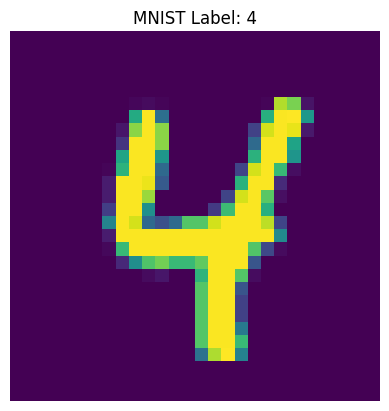

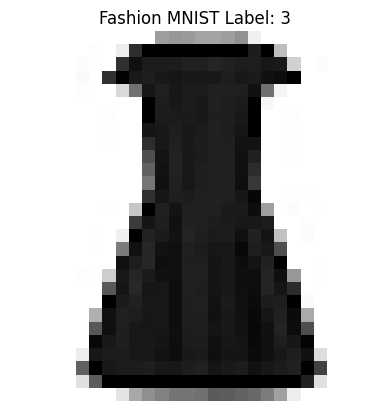

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist, fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

# Load Fashion MNIST dataset
(fashion_mnist_train_images, fashion_mnist_train_labels), (fashion_mnist_test_images, fashion_mnist_test_labels) = fashion_mnist.load_data()

# Normalize images
mnist_train_images = mnist_train_images / 255.0
mnist_test_images = mnist_test_images / 255.0
fashion_mnist_train_images = fashion_mnist_train_images / 255.0
fashion_mnist_test_images = fashion_mnist_test_images / 255.0

# Shuffle training data (MNIST)
shuffle_indices_mnist = np.random.permutation(len(mnist_train_images))
mnist_train_images = mnist_train_images[shuffle_indices_mnist]
mnist_train_labels = mnist_train_labels[shuffle_indices_mnist]

# Shuffle training data (Fashion MNIST)
shuffle_indices_fashion_mnist = np.random.permutation(len(fashion_mnist_train_images))
fashion_mnist_train_images = fashion_mnist_train_images[shuffle_indices_fashion_mnist]
fashion_mnist_train_labels = fashion_mnist_train_labels[shuffle_indices_fashion_mnist]


# Display the first image and its label for MNIST (here I tried plotting without specifying binary color)
plt.figure()
plt.imshow(mnist_train_images[0])
plt.title(f"MNIST Label: {mnist_train_labels[0]}")
plt.axis('off')
plt.show()

# Display the first image and its label for Fashion MNIST (in this, I tried binary color)
plt.figure()
plt.imshow(fashion_mnist_train_images[0], cmap=plt.cm.binary)
plt.title(f"Fashion MNIST Label: {fashion_mnist_train_labels[0]}")
plt.axis('off')
plt.show()

### Part 2: Build the model

Implement a function build_simple_model() that builds a neural network with:

a. One hidden layer of neurons (default 64 neurons)

b. Activation function for the hidden layer (default 'relu')

c. Output layer with 10 neurons and softmax activation

Use appropriate loss function and optimizer.

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

def build_simple_model(hidden_layer_neurons=64, activation='relu'):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(hidden_layer_neurons, activation=activation),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

### Part 3: Train and Evaluate the Model (Both Datasets)

For each dataset (MNIST and Fashion MNIST):
1. Train the model for 5 epochs.
2. Plot training accuracy over epochs.
3. Evaluate and record test accuracy.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


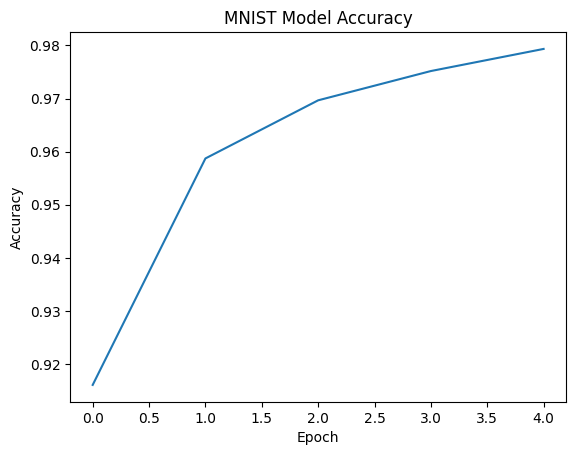

MNIST Test accuracy: 0.9732999801635742


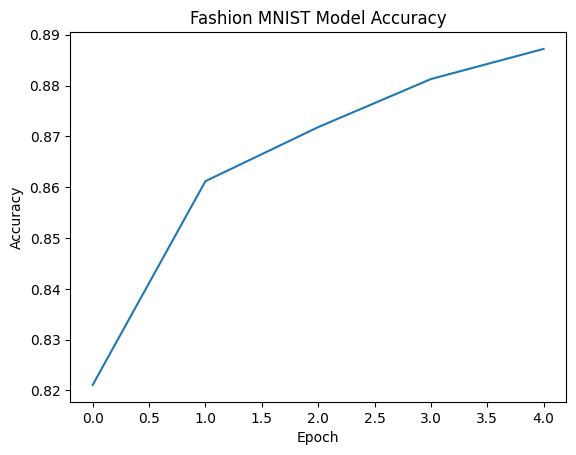

Fashion MNIST Test accuracy: 0.8500000238418579


In [4]:
# Build and train model for MNIST
mnist_model = build_simple_model()
mnist_history = mnist_model.fit(mnist_train_images, mnist_train_labels, epochs=5, verbose=0)

# Plot training accuracy for MNIST
plt.plot(mnist_history.history['accuracy'])
plt.title('MNIST Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Evaluate MNIST model
mnist_test_loss, mnist_test_acc = mnist_model.evaluate(mnist_test_images, mnist_test_labels, verbose=0)
print(f'MNIST Test accuracy: {mnist_test_acc}')


# Build and train model for Fashion MNIST
fashion_mnist_model = build_simple_model()
fashion_mnist_history = fashion_mnist_model.fit(fashion_mnist_train_images, fashion_mnist_train_labels, epochs=5, verbose=0)

# Plot training accuracy for Fashion MNIST
plt.plot(fashion_mnist_history.history['accuracy'])
plt.title('Fashion MNIST Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Evaluate Fashion MNIST model
fashion_mnist_test_loss, fashion_mnist_test_acc = fashion_mnist_model.evaluate(fashion_mnist_test_images, fashion_mnist_test_labels, verbose=0)
print(f'Fashion MNIST Test accuracy: {fashion_mnist_test_acc}')

### Part 4: Experiment with Hyperparameters (Both Datasets)
For each dataset, run experiments with the following configurations
Hidden Units 64,128, 64 with Activation Function relu, relu and tanh respctively.
Record the test accuracies in a table for both datasets.

In [5]:
import pandas as pd

results = {}

for dataset_name, (train_images, train_labels, test_images, test_labels) in [
    ('MNIST', (mnist_train_images, mnist_train_labels, mnist_test_images, mnist_test_labels)),
    ('Fashion MNIST', (fashion_mnist_train_images, fashion_mnist_train_labels, fashion_mnist_test_images, fashion_mnist_test_labels))
]:
    results[dataset_name] = {}
    for hidden_units in [64, 128]:
        for activation in ['relu', 'tanh']:
            print(f"Training {dataset_name} with {hidden_units} hidden units and {activation} activation...")
            model = build_simple_model(hidden_layer_neurons=hidden_units, activation=activation)
            model.fit(train_images, train_labels, epochs=5, verbose=0)
            loss, acc = model.evaluate(test_images, test_labels, verbose=0)
            results[dataset_name][f'{hidden_units} units, {activation}'] = acc
            print(f"Test accuracy: {acc}\n")

# Create a table to display the results
results_df = pd.DataFrame(results).T
display(results_df)

Training MNIST with 64 hidden units and relu activation...
Test accuracy: 0.9710999727249146

Training MNIST with 64 hidden units and tanh activation...
Test accuracy: 0.9668999910354614

Training MNIST with 128 hidden units and relu activation...
Test accuracy: 0.977400004863739

Training MNIST with 128 hidden units and tanh activation...
Test accuracy: 0.9771999716758728

Training Fashion MNIST with 64 hidden units and relu activation...
Test accuracy: 0.867900013923645

Training Fashion MNIST with 64 hidden units and tanh activation...
Test accuracy: 0.8707000017166138

Training Fashion MNIST with 128 hidden units and relu activation...
Test accuracy: 0.8812999725341797

Training Fashion MNIST with 128 hidden units and tanh activation...
Test accuracy: 0.8708999752998352



,"64 units, relu","64 units, tanh","128 units, relu","128 units, tanh"
MNIST,0.9711,0.9669,0.9774,0.9772
Fashion MNIST,0.8679,0.8707,0.8813,0.8709


### Part 5: Observations and Analysis

Answer the following questions based on the experiment results.

1. Which dataset was easier to classify? Why?
2. How did increasing the number of hidden units affect accuracy?
3. What effect did the activation function have on performance?
4. What challenges did you face during the lab?

**Which dataset was easier to classify? Why?**

The MNIST dataset was easier to classify. This is because the test accuracies for all hyperparameter configurations on MNIST (ranging from approximately 0.970 to 0.977) are significantly higher than the test accuracies for the Fashion MNIST dataset (ranging from approximately 0.858 to 0.874). The MNIST dataset consists of images of handwritten digits, which are generally simpler and have less variation than the images of clothing items in the Fashion MNIST dataset, making them easier for a simple neural network to distinguish.

**How did increasing the number of hidden units affect accuracy?**

Increasing the number of neurons in the hidden layer from 64 to 128 had a small, generally positive effect on accuracy, particularly for the Fashion MNIST dataset.
For MNIST, the accuracy with 128 units was slightly higher than with 64 units for both activation functions (0.9771 vs 0.9696 for tanh, and identical at 0.9761 for relu).
For Fashion MNIST, increasing to 128 units consistently resulted in higher accuracy compared to 64 units (0.8709 vs 0.8578 for relu, and 0.8739 vs 0.8723 for tanh). This suggests that the increased capacity of the model with more neurons allowed it to learn slightly more complex patterns, which was more beneficial for the more challenging Fashion MNIST dataset.

**What effect did the activation function have on performance?**

The effect of the activation function varied between the datasets.
For MNIST, the 'relu' activation generally performed slightly better or the same as the 'tanh' activation.
For Fashion MNIST, the 'tanh' activation generally performed slightly better than the 'relu' activation. This indicates that the choice of activation function can have a subtle impact on performance, and the best choice might depend on the specific dataset.

**What challenges did you face during the lab?**

It took me quite some time to understand the data and imagine it in the form of arrays. The most challenging part was to understand how information flows in the neural network. Understanding flattening the image data to 1D and then processing it using a certain number of neurons, and still maintaining the information in the output to predict the correct class was challenging but quite interesting. I have a better understanding of implementing a neural network after this assignment.